# Poisson Regresion with MinMax Scaler & Polynomial Features

### This Code template is for regression analysis using the Poisson Regressor where rescaling method used is MinMaxScaler and feature transformation is done via Polynomial Features.

### Required Packages

In [ ]:
import warnings
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as se
from sklearn.linear_model import PoissonRegressor
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 
warnings.filterwarnings('ignore')

### Initialization
Filepath of CSV file

In [ ]:
#filepath
file_path= ""

List of features which are  required for model training.

In [ ]:
#x_values
features=[]

Target feature for prediction.

In [ ]:
#y_value
target=''

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [ ]:
df=pd.read_csv(file_path)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [ ]:
X=df[features]
Y=df[target]

### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.


In [ ]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)

Calling preprocessing functions on the feature and target set.


In [ ]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])
X=EncodeX(X)
Y=NullClearner(Y)
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


#### Correlation Map

In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

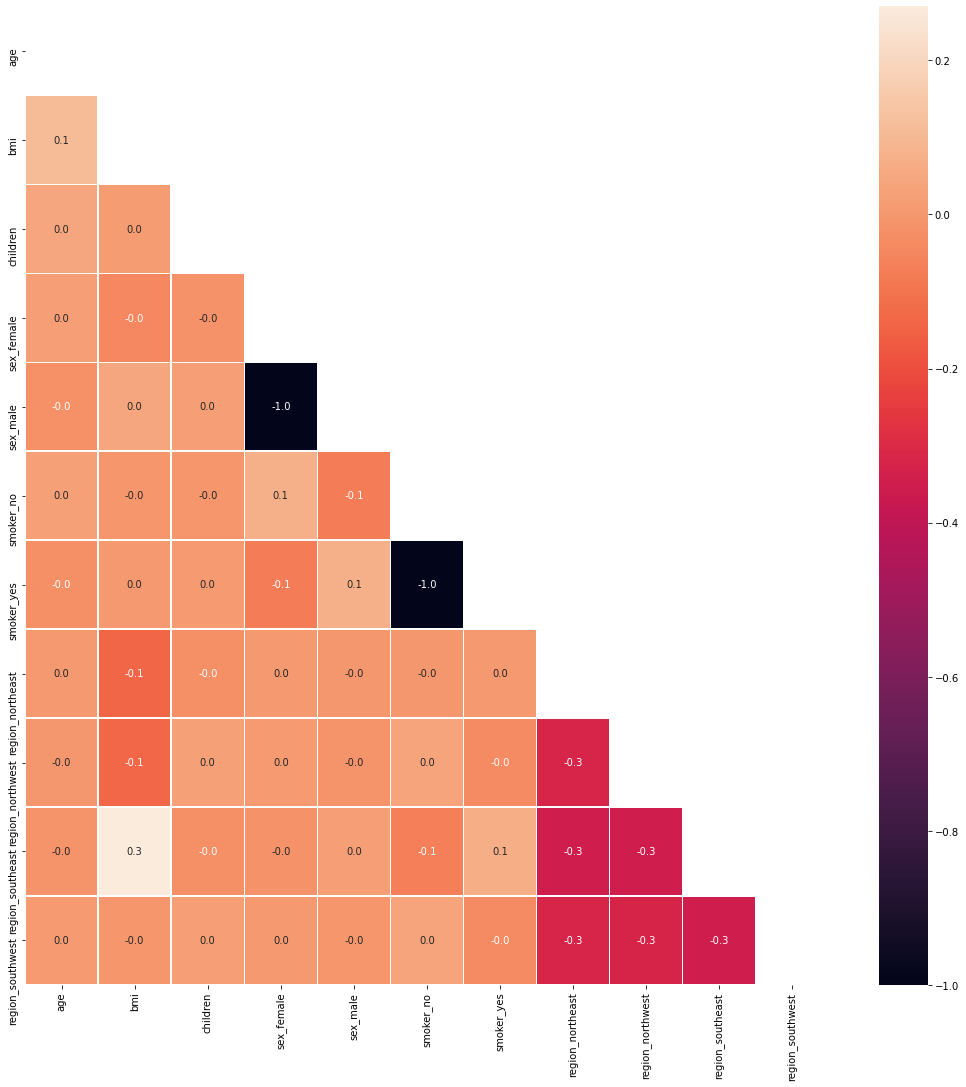

In [ ]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
se.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)
plt.show()

### Data Splitting

The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

### Model

Generalized Linear Model with a Poisson distribution.

This regressor uses the ‘log’ link function.

#### Parameters:
**alphafloat, default=1** ->
Constant that multiplies the penalty term and thus determines the regularization strength. alpha = 0 is equivalent to unpenalized GLMs. In this case, the design matrix X must have full column rank (no collinearities).

**fit_interceptbool, default=True** ->
Specifies if a constant (a.k.a. bias or intercept) should be added to the linear predictor (X @ coef + intercept).

**max_iterint, default=100** ->
The maximal number of iterations for the solver.

**tolfloat, default=1e-4** ->
Stopping criterion. For the lbfgs solver, the iteration will stop when max{|g_j|, j = 1, ..., d} <= tol where g_j is the j-th component of the gradient (derivative) of the objective function.

**warm_startbool, default=False** ->
If set to True, reuse the solution of the previous call to fit as initialization for coef_ and intercept_ .

**verboseint, default=0** ->
For the lbfgs solver set verbose to any positive number for verbosity.

### MinMax Scaler

Transform features by scaling each feature to a given range.

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

### Polynomial Features

Generate polynomial and interaction features.

Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

In [ ]:
model=make_pipeline(MinMaxScaler(), PolynomialFeatures(), PoissonRegressor())
model.fit(x_train,y_train)

#### Model Accuracy

We will use the trained model to make a prediction on the test set.Then use the predicted value for measuring the accuracy of our model.

score: The score function returns the coefficient of determination R2 of the prediction.



In [ ]:
print("Accuracy score {:.2f} %\n".format(model.score(x_test,y_test)*100))

Accuracy score 89.82 %



> **r2_score**: The **r2_score** function computes the percentage variablility explained by our model, either the fraction or the count of correct predictions.  

> **mae**: The **mean abosolute error** function calculates the amount of total error(absolute average distance between the real data and the predicted data) by our model.  

> **mse**: The **mean squared error** function squares the error(penalizes the model for large errors) by our model. 

In [ ]:
y_pred=model.predict(x_test)
print("R2 Score: {:.2f} %".format(r2_score(y_test,y_pred)*100))
print("Mean Absolute Error {:.2f}".format(mean_absolute_error(y_test,y_pred)))
print("Mean Squared Error {:.2f}".format(mean_squared_error(y_test,y_pred)))

R2 Score: 89.82 %
Mean Absolute Error 2611.77
Mean Squared Error 15559588.61


#### Prediction Plot

First, we make use of a plot to plot the actual observations, with x_train on the x-axis and y_train on the y-axis.
For the regression line, we will use x_train on the x-axis and then the predictions of the x_train observations on the y-axis.

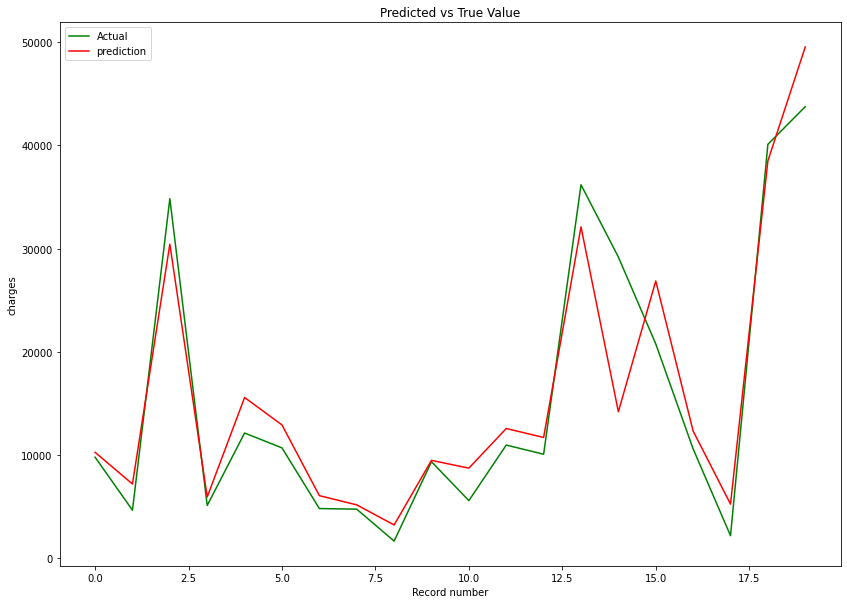

In [ ]:
n=len(x_test) if len(x_test)<20 else 20
plt.figure(figsize=(14,10))
plt.plot(range(n),y_test[0:n], color = "green")
plt.plot(range(n),model.predict(x_test[0:n]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(target)
plt.show()

#### Creator: Ayush Gupta , Github: [Profile](https://github.com/guptayush179)